### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [2]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/training_data/SMP65#010 70d 820um.csv"


In [3]:
filename = path.split("/")[-1]
filename

'SMP65#010 70d 820um.csv'

In [4]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [5]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,40253.0,23554.2,70d 820um,3.54994,0.037256,0.036507,0.035845,0.035851,0.036244,0.036332,...,-0.275936,-0.182681,-0.153185,-0.198179,-0.253059,-0.272100,-0.305597,-0.225356,-0.197980,-0.182540
1,40258.4,23554.2,70d 820um,3.43524,0.039032,0.038614,0.038673,0.038728,0.038532,0.038562,...,-0.037869,-0.083712,-0.108230,-0.100065,-0.087600,-0.080260,-0.056327,-0.014532,0.011343,0.007981
2,40263.9,23554.2,70d 820um,3.51870,0.035806,0.036003,0.037334,0.038401,0.037923,0.036598,...,0.050549,0.021275,0.022757,0.040405,0.060266,0.064124,0.037572,-0.006146,-0.038362,-0.022686
3,40269.3,23554.2,70d 820um,3.57578,0.032151,0.031809,0.031791,0.032218,0.032744,0.033197,...,-0.192814,-0.157899,-0.162021,-0.229521,-0.292474,-0.222688,-0.181271,-0.178193,-0.150129,-0.118968
4,40274.7,23554.2,70d 820um,3.56623,0.029470,0.028878,0.028328,0.027734,0.027300,0.027252,...,-0.093187,-0.070417,-0.084500,-0.121198,-0.163340,-0.192094,-0.225276,-0.204970,-0.150684,-0.157918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,40573.6,24069.3,70d 820um,3.59903,0.034905,0.034986,0.034399,0.033770,0.033633,0.033888,...,-0.079350,-0.102773,-0.143730,-0.178223,-0.172435,-0.148927,-0.124020,-0.114703,-0.117844,-0.113142
6140,40579.0,24069.3,70d 820um,3.57410,0.040409,0.040744,0.041003,0.041340,0.041630,0.041937,...,-0.155610,-0.128756,-0.134918,-0.184649,-0.224974,-0.248244,-0.267434,-0.249948,-0.264085,-0.409678
6141,40584.4,24069.3,70d 820um,3.52141,0.032184,0.031725,0.031192,0.031232,0.032178,0.033412,...,-0.080312,-0.102963,-0.138930,-0.220757,-0.347931,-0.236641,-0.222966,-0.235755,-0.139983,-0.080641
6142,40589.9,24069.3,70d 820um,3.43472,0.033654,0.033139,0.032943,0.033346,0.033890,0.034022,...,-0.293151,-0.254141,-0.223883,-0.199118,-0.169626,-0.164825,-0.165135,-0.136336,-0.105745,-0.106823


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [6]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

In [7]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: 

Index([ 900.0,  901.0,  902.0,  903.0,  904.0,  905.0,  906.0,  907.0,  908.0,
        909.0,
       ...
       2101.0, 2102.0, 2103.0, 2104.0, 2105.0, 2106.0, 2107.0, 2108.0, 2109.0,
       2110.0],
      dtype='object', length=1063)


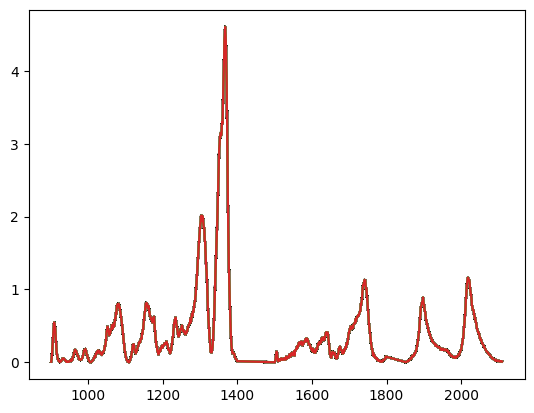

# Save results to dataframe

In [9]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

In [ ]:
reconstructed =pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

print(reconstructed.columns[:-2])
for i in range(len(reconstructed.iloc[:,:-2])):
    plt.plot(reconstructed.columns[:-2], reconstructed.iloc[i,:-2])
plt.show()

In [11]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Quasar

In [ ]:

path_to_save = 'C:/Users/Zach/Documents/BVAE_processed/'
os.makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Hyperspectra/"
os.makedirs(path_to_save, exist_ok=True)
file=os.path.join(path_to_save + 'hyperspectrum_'+filename)
hyperspectrum.to_csv(file, index=False)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Reconstructions/"
os.makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)